In [1]:
# importing the libraries for data processing
import numpy as np 
import pandas as pd 

#These two modules will be used to create some basic visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#This is a jupyter magic command that embeds the image generated by matplotlib right after the code cell
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)

In [2]:
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
charts_df['date'] = pd.to_datetime(charts_df['date'])

In [3]:
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,76,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,85,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,85,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,69,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [4]:
artists_df = pd.read_csv('data/spotify_daily_charts_artists.csv')
artists_df = artists_df.rename(columns={'popularity':'artist_popularity'})

In [5]:
df = charts_df.merge(tracks_df, on='track_id', how='left')
df = df.drop(columns='track_name_y')
df = df.rename(columns={'track_name_x':'track_name'})
df = df.merge(artists_df, on='artist_id', how='left')
df = df.drop(columns='artist_name_y')
df = df.rename(columns={'artist_name_x':'artist_name'})
df = df.set_index('date')
df=df.dropna()

In [6]:
edm_df = df[df['genres'].str.contains('edm')]
edm_tracks = edm_df.drop_duplicates(subset='track_id')

In [7]:
# edm_tracks[['popularity', 'danceability', 'energy', 'loudness',
#        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#        'valence', 'tempo']].describe()

In [8]:
# for col in ['popularity', 'danceability', 'energy', 'loudness',
#        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#        'valence', 'tempo']:
#     sns.distplot(edm_tracks[col])
#     plt.title(col)
#     plt.ylabel('Frequency')
#     plt.show()

In [9]:
edm_artists = edm_df.groupby('artist')[['streams']].sum().sort_values(by='streams', ascending =False)
songs_artist = edm_tracks['artist'].value_counts().to_frame().reset_index().rename(columns = {'artist':'no. of songs', 'index':'artist'})
#songs_artist

In [10]:
edm_artists = edm_artists.merge(songs_artist, 'inner', 'artist')[:11]

# David  Guetta Performance

In [11]:
# # Standard imports 
# from bokeh.io import output_notebook, show
# from bokeh.plotting import figure

# from bokeh.models.tools import HoverTool

# from bokeh.models import ColumnDataSource, Range1d
# output_notebook()

In [12]:
# #Simple time series plot with selectable legend and hover output

# p = figure(x_axis_type="datetime", title="Spotify Daily Charts", plot_height=350, plot_width=800)

# #reformat data to suit ColumnDataSource
# artists = edm_artists[:11]['artist']
# colors=['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red']
# for n,artist in enumerate(artists):
#     artist_df = pd.DataFrame({'date':pd.unique(df.index)}).set_index('date')
#     top5songs = df[(df['artist']==artist)].groupby(['track_name'])[['streams']].sum()\
#                                             .sort_values(by='streams', ascending=False)[:5].reset_index()['track_name']
#     positions = df[(df['artist']==artist)&(df['track_name'].isin(top5songs))].groupby('date')[['position']].min().rolling(7).min()
#     artist_df['position'] = positions
#     artist_df = artist_df.reset_index()
#     artist_df['artist'] = artist

#     source = ColumnDataSource(data = {'date': artist_df['date'].values,
#                                       'position': artist_df['position'].values,
#                                       'artist': artist_df['artist'].values})
    
#     #add .flatten() to y-values to deal with rolling window value nesting
#     p.line(x='date', y='position', color=colors[n], source=source, legend_label=artist)
#     #add hover tool
#     p.add_tools(HoverTool(
#         tooltips=[
#                 ( 'date',   '@date{%F}'),
#                 ( 'position',  '@position' ), # use @{ } for field names with spaces
#                 ( 'artist', '@artist'      ),
#             ],
#         formatters={
#             '@date' : 'datetime',
#         }
#     ))

# #plot formatting
# p.xgrid.grid_line_color=None
# p.ygrid.grid_line_alpha=0.5
# p.xaxis.axis_label = 'date'
# p.yaxis.axis_label = 'Position'
# p.y_range.flipped = True
# p.y_range=Range1d(200,0)
# p.yaxis.ticker = [1,50,100,150,200]

# p.legend.location = "bottom_left"


# p.legend.click_policy="hide"

# show(p)

In [13]:
#song streams
guetta_charted = edm_df[edm_df.artist == 'David Guetta'].groupby(['track_id', 'track_name'])[['streams']].sum().sort_values(by = 'streams', ascending=False).reset_index()
guetta_charted

,track_id,track_name,streams
0,3A7qX2QjDlPnazUsRk5y0M,2U (feat. Justin Bieber),12589050
1,2zy9TMoZlYGuCNY4TLqG24,Don't Leave Me Alone (feat. Anne-Marie),5346031
2,33IOhptvC2Qoy2UhjiHXLV,Flames,5150172
3,2lYTJK94hb0fd1LQtb6Dhk,Don't Leave Me Alone (feat. Anne-Marie),3006749
4,6RnkFd8Fqqgk1Uni8RgqCQ,Like I Do,2696045
5,0tPQPaOKM32WgMSbPCYyRH,Dirty Sexy Money (feat. Charli XCX & French Mo...,1947740
6,0YammaEkYSeo9vQYZ1OwS6,Say My Name,559563
7,4Tvw0lweq9l2JPQKFbpbBQ,Better When You're Gone,23222
8,3vgNmjuRDnGLxUFGCLkwpm,Light My Body Up (feat. Nicki Minaj & Lil Wayne),21507


# Guetta Charted vs Uncharted

In [14]:
# read and process the playlist data for keyword
tracks1_df = edm_tracks[edm_tracks.artist=='David Guetta']
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']='David Guetta'
#tracks1_df.head()


###################### set keyword
KEYWORD2='david guetta playlist'

# read and process the playlist data for keyword
playlist2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_data.csv')
# playlist2_df.head(20)

# read and process the playlist data for keyword
tracks2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/'+KEYWORD2+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
# tracks2_df = tracks2_df.set_index('track_id')
# tracks2_df2 = tracks2_df.drop(index = '3A7qX2QjDlPnazUsRk5y0M')
# #tracks2_df = tracks2_df[tracks2_df.track_id.apply(lambda x: x.drop() if x in guetta_charted.track_id.tolist())]

#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']=KEYWORD2

tracks2_df = tracks2_df[(tracks2_df['artist_name']=='David Guetta') | (tracks2_df['track_name'].str.contains('David Guetta'))]
tracks2_df.head(100)

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,duration_mins,genre
1,5K6Ssv4Z3zRvxt0P6EKUAP,Heartbreak Anthem (with David Guetta & Little ...,4sTQVOfp9vEMCemLw50sbu,Galantis,6kBuGNoOGE7uiPhN82dcJ1,183725,2021-05-20,82,0.595,0.784,...,0.000000,0.0608,0.4790,124.111,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,3.062083,david guetta playlist
2,46W9QGI2bVjitikXmpHFgv,Get Together,1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,2ofQzyhu2LGNLPfIPM0209,162051,2021-05-07,72,0.849,0.669,...,0.000004,0.0727,0.6070,117.024,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,2.700850,david guetta playlist
4,7ft8GUKMIuFnH4lueyOTQi,BED - David Guetta Festival Mix,6DgP9otnZw5z6daOntINxp,Joel Corry,25SO6nYRYrNwBngu5UwThd,235200,2021-04-23,66,0.687,0.916,...,0.258000,0.0474,0.2460,125.001,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,3.920000,david guetta playlist
5,0cVWsZDecQYXWY4j1KjhDg,Lifestyle (feat. Adam Levine) - David Guetta S...,07YZf4WDAMNwqr4jfgOZ8y,Jason Derulo,2B0taAq11pt0MWYJ7BhiN2,135661,2021-02-18,63,0.688,0.724,...,0.000000,0.3190,0.7630,123.072,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,2.261017,david guetta playlist
46,2NZJKUPIGfJqLAzONNr4gv,Kill Me Slow,1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,0fKU8zzmBjXNAJp5Uo2dml,208095,2020-07-17,66,0.698,0.859,...,0.208000,0.2280,0.5180,126.039,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,3.468250,david guetta playlist
47,5ovAmYzYLeEmOX6P3bmlzV,Dreams (feat. Lanie Gardner),1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,4gj29oc0vz1qPuosvrkt8B,204102,2020-12-04,70,0.610,0.896,...,0.000157,0.0943,0.0723,128.056,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,3.401700,david guetta playlist
48,1w8DxFHDDInmn5TovLKKrW,Save My Life (feat. Lovespeake),1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,4tqrHaVlCyNSvhRD4RAvCQ,183750,2020-11-13,67,0.704,0.745,...,0.741000,0.2340,0.0511,128.002,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,3.062500,david guetta playlist
49,7HXMzmHisLPilu3phwi73h,Let's Love - David Guetta & MORTEN Future Rave...,1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,5ycDNsggvTkFJsxkPu6Vzr,222850,2020-10-23,52,0.525,0.797,...,0.748000,0.1790,0.0855,125.878,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,1ONoVwmw96EtWKfcdsrVZf,David Guetta Playlist,3.714167,david guetta playlist


In [15]:
# for col in ['popularity', 'danceability', 'energy', 
#        'loudness', 'speechiness', 'acousticness', 'instrumentalness',
#        'liveness', 'valence', 'tempo']: #'key', 'mode',
#     fig = plt.figure()
#     ax= fig.add_subplot(111)
    
#     sns.distplot(tracks1_df[col], ax=ax, label= 'Charted')
#     sns.distplot(tracks2_df[col], ax=ax, label= 'Uncharted')
#     plt.title("%s vs %s: %s " % ('Charted','Uncharted',col))
#     plt.ylabel('Frequency')
#     plt.legend(frameon=False)
#     plt.show()

### in barplot

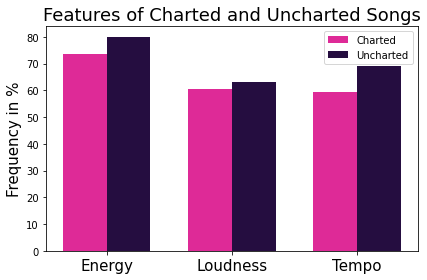

In [16]:
#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

tracks1_df['loudness'] = scaler.fit_transform(tracks1_df[['loudness']])
tracks1_df['tempo'] =  scaler.fit_transform(tracks1_df[['tempo']])
tracks2_df['loudness'] = scaler.fit_transform(tracks2_df[['loudness']])
tracks2_df['tempo'] =  scaler.fit_transform(tracks2_df[['tempo']])


set1_means = []
set2_means = []

for col in ['energy', 'loudness', 'tempo']:
    
    set1_means.append(tracks1_df[col].mean()*100)
    set2_means.append(tracks2_df[col].mean()*100)

labels = ['Energy', 'Loudness', 'Tempo']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, set1_means, width, label='Charted', color ="#DE2A97" )
rects2 = ax.bar(x + width/2, set2_means, width, label='Uncharted', color ="#250D40")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency in %',fontsize=15)
ax.set_title('Features of Charted and Uncharted Songs', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 0, fontsize=15)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

# David Guetta vs Top 10 Streamed EDM Artists

In [17]:
# read and process the playlist data for keyword
tracks1_df = edm_tracks[edm_tracks.artist=='David Guetta']
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']='David Guetta'
#tracks1_df.head()

# read and process the playlist data for keyword
tracks2_df = edm_tracks[edm_tracks.artist!='David Guetta']
#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']= 'Other EDM Artists'
#tracks2_df.head()

In [18]:
# for col in ['popularity', 'danceability', 'energy', 
#        'loudness', 'speechiness', 'acousticness', 'instrumentalness',
#        'liveness', 'valence', 'tempo']: #'key', 'mode',
#     fig = plt.figure()
#     ax= fig.add_subplot(111)
    
#     sns.distplot(tracks1_df[col], ax=ax, label= 'David Guetta')
#     sns.distplot(tracks2_df[col], ax=ax, label= 'Other EDM Artists')
#     plt.title("%s vs %s: %s " % ('David Guetta','Other EDM Artists',col))
#     plt.ylabel('Frequency')
#     plt.legend(frameon=False)
#     plt.show()

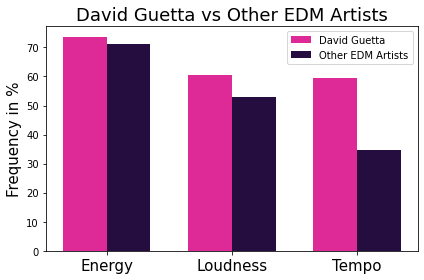

In [19]:
#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

tracks1_df['loudness'] = scaler.fit_transform(tracks1_df[['loudness']])
tracks1_df['tempo'] =  scaler.fit_transform(tracks1_df[['tempo']])
tracks2_df['loudness'] = scaler.fit_transform(tracks2_df[['loudness']])
tracks2_df['tempo'] =  scaler.fit_transform(tracks2_df[['tempo']])


set1_means = []
set2_means = []

for col in ['energy', 'loudness', 'tempo']:
    
    set1_means.append(tracks1_df[col].mean()*100)
    set2_means.append(tracks2_df[col].mean()*100)

labels = ['Energy', 'Loudness', 'Tempo']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, set1_means, width, label='David Guetta', color ="#DE2A97" )
rects2 = ax.bar(x + width/2, set2_means, width, label='Other EDM Artists', color ="#250D40")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency in %',fontsize=15)
ax.set_title('David Guetta vs Other EDM Artists', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 0, fontsize=15)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

## per EDM Artist

In [20]:
edm_artists.artist.unique()

array(['The Chainsmokers', 'Marshmello', 'Jonas Blue', 'Zedd',
       'Clean Bandit', 'Martin Garrix', 'Kygo', 'DJ Snake',
       'Calvin Harris', 'Cheat Codes', 'David Guetta'], dtype=object)

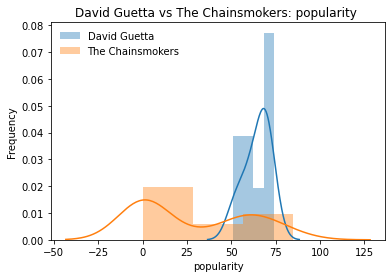

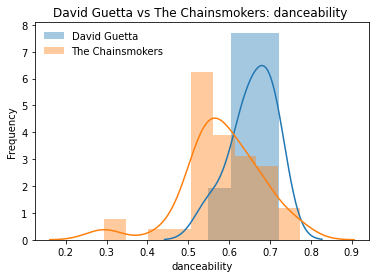

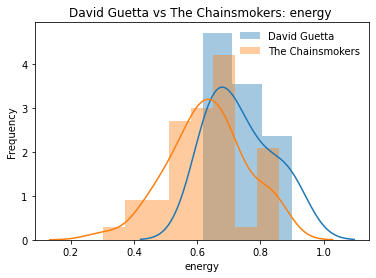

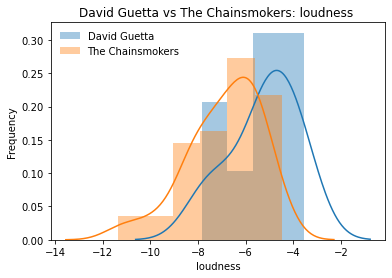

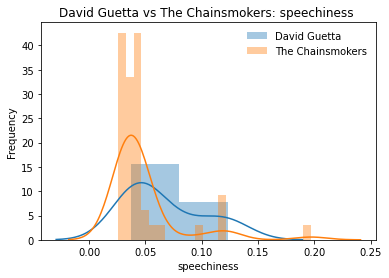

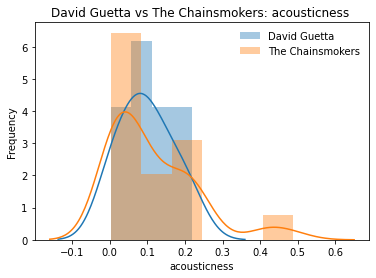

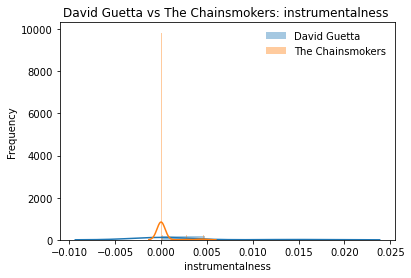

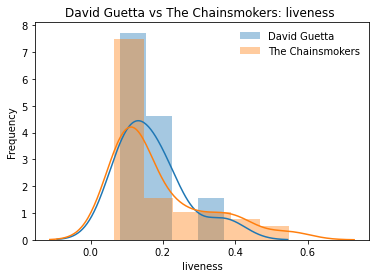

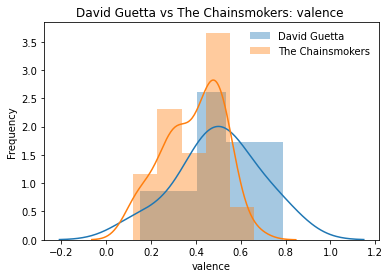

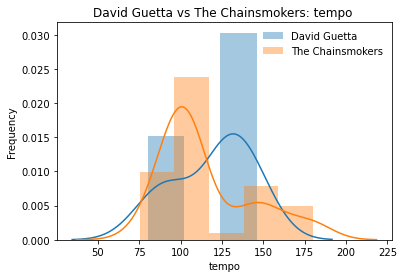

In [21]:
KEYWORD2 = 'The Chainsmokers'

# read and process the playlist data for keyword
tracks1_df = edm_tracks[edm_tracks.artist=='David Guetta']
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']='David Guetta'
#tracks1_df.head()

# read and process the playlist data for keyword
tracks2_df = edm_tracks[edm_tracks.artist==KEYWORD2]
#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']= KEYWORD2
#tracks2_df.head()

for col in ['popularity', 'danceability', 'energy', 
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']: #'key', 'mode',
    fig = plt.figure()
    ax= fig.add_subplot(111)
    
    sns.distplot(tracks1_df[col], ax=ax, label= 'David Guetta')
    sns.distplot(tracks2_df[col], ax=ax, label= KEYWORD2)
    plt.title("%s vs %s: %s " % ('David Guetta',KEYWORD2,col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()

# David Guetta vs Top 10 Streamed EDM songs

In [22]:
top_edm_tracks = edm_df.groupby(['track_id', 'track_name','artist'])[['streams']].sum().sort_values(by = 'streams', ascending=False).reset_index()[:10]
# rudimental is top 15 sa top  streams edm artists
top_edm_tracks = edm_df[edm_df.track_id.apply(lambda x: x in top_edm_tracks.track_id.tolist())]
top_edm_tracks

,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres,artist_popularity
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,...,1.0,0.0338,0.414,0.0,0.111,0.661,95.01,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86
2017-01-02,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,173102,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,...,1.0,0.0338,0.414,0.0,0.111,0.661,95.01,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86
2017-01-03,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,181637,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,...,1.0,0.0338,0.414,0.0,0.111,0.661,95.01,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86
2017-01-04,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,179363,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,...,1.0,0.0338,0.414,0.0,0.111,0.661,95.01,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86
2017-01-05,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,178808,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,...,1.0,0.0338,0.414,0.0,0.111,0.661,95.01,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-16,151,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,27616,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,...,1.0,0.0338,0.414,0.0,0.111,0.661,95.01,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86
2021-05-17,160,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,28445,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,...,1.0,0.0338,0.414,0.0,0.111,0.661,95.01,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86
2021-05-18,168,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,30060,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,...,1.0,0.0338,0.414,0.0,0.111,0.661,95.01,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86


In [23]:
# read and process the playlist data for keyword
tracks1_df = edm_tracks[edm_tracks.artist=='David Guetta']
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']='David Guetta'
#tracks1_df.head()

# read and process the playlist data for keyword
tracks2_df = top_edm_tracks.drop_duplicates(subset='track_id')
#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']= 'Top EDM Songs'
#tracks2_df.head()

In [24]:
# for col in ['popularity', 'danceability', 'energy', 
#        'loudness', 'speechiness', 'acousticness', 'instrumentalness',
#        'liveness', 'valence', 'tempo']: #'key', 'mode',
#     fig = plt.figure()
#     ax= fig.add_subplot(111)
    
#     sns.distplot(tracks1_df[col], ax=ax, label= 'David Guetta')
#     sns.distplot(tracks2_df[col], ax=ax, label= 'Top EDM Songs')
#     plt.title("%s vs %s: %s " % ('David Guetta','Top EDM Songs',col))
#     plt.ylabel('Frequency')
#     plt.legend(frameon=False)
#     plt.show()

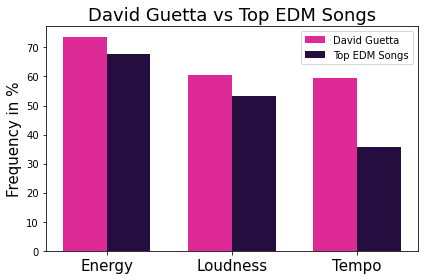

In [25]:
#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

tracks1_df['loudness'] = scaler.fit_transform(tracks1_df[['loudness']])
tracks1_df['tempo'] =  scaler.fit_transform(tracks1_df[['tempo']])
tracks2_df['loudness'] = scaler.fit_transform(tracks2_df[['loudness']])
tracks2_df['tempo'] =  scaler.fit_transform(tracks2_df[['tempo']])


set1_means = []
set2_means = []

for col in ['energy', 'loudness', 'tempo']:
    
    set1_means.append(tracks1_df[col].mean()*100)
    set2_means.append(tracks2_df[col].mean()*100)

labels = ['Energy', 'Loudness', 'Tempo']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, set1_means, width, label='David Guetta', color ="#DE2A97" )
rects2 = ax.bar(x + width/2, set2_means, width, label='Top EDM Songs', color ="#250D40")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency in %',fontsize=15)
ax.set_title('David Guetta vs Top EDM Songs', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 0, fontsize=15)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()